In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')#样式美化
from sklearn.metrics import classification_report  #这个包是评价报告

In [20]:
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [21]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


D:\Anaconda3\envs\pt38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda3\envs\pt38\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


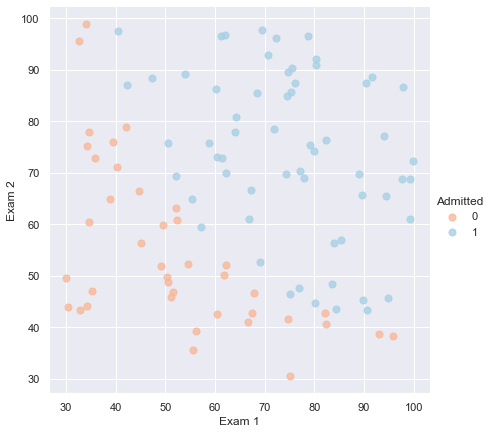

In [22]:
sns.set(context="notebook",style="darkgrid",palette=sns.color_palette("RdBu",2))
sns.lmplot('Exam 1','Exam 2',hue='Admitted',data=data,
           size=6,
           fit_reg=False,
           scatter_kws={"s":50}
           )
plt.show()

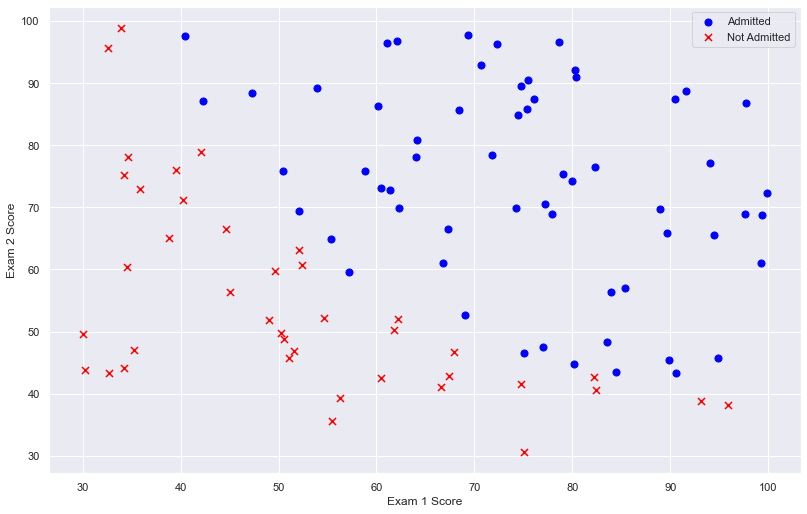

In [23]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [24]:
def get_X(df):
    ones=pd.DataFrame({'ones':np.ones(len(df))})
    data=pd.concat([ones,df],axis=1)
    # return data.iloc[:,:-1].as_matrix()
    return data.iloc[:,:-1].values

def get_y(df):
    return np.array(df.iloc[:,-1])

def normalize_feature(df):
    return df.apply(lambda column:(column - column.mean())/column.std())

In [25]:
X = get_X(data)
print(X.shape)

y=get_y(data)
print(y.shape)


(100, 3)
(100,)


In [26]:
# 实现sigmoid函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


TypeError: 'int' object is not iterable

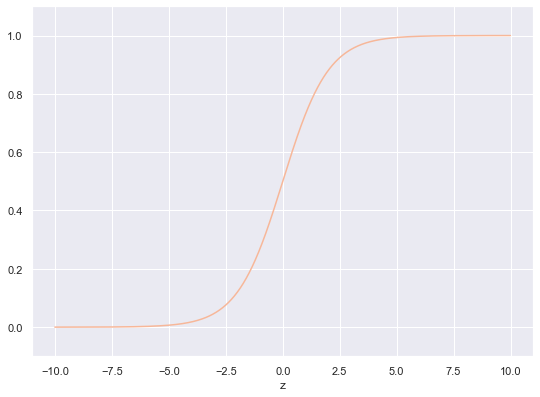

In [27]:
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(np.arange(-10,10,step=0.01),
        sigmoid(np.arange(-10,10,step=0.01)))
ax.set_ylim((-0.1,1.1))
ax.set_xlabel('z',fontdict=18)
ax.set_ylabel('g(z)',fontdict=18)
ax.set_title('sigmoid function',fontdict=18)
plt.show()

In [28]:
theta = np.zeros(3)
theta

array([0., 0., 0.])

In [29]:
def cost(theta,X,y):
    return np.mean(-y * np.log(sigmoid(X @ theta))-(1-y) * np.log(1-sigmoid(X @ theta)))

In [30]:
cost(theta,X,y)

0.6931471805599453

In [31]:
def gradient(theta, X, y):
    return (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)

In [32]:
gradient(theta, X, y)


array([ -0.1       , -12.00921659, -11.26284221])

In [33]:
import scipy.optimize as opt

In [34]:
res=opt.minimize(fun=cost,x0=theta,args=(X,y),method='Newton-CG',jac=gradient)

In [35]:
print(res)

     fun: 0.2034977015913818
     jac: array([-6.24953495e-08, -5.45563338e-06, -6.53058766e-06])
 message: 'Optimization terminated successfully.'
    nfev: 73
    nhev: 0
     nit: 29
    njev: 261
  status: 0
 success: True
       x: array([-25.1612193 ,   0.2062308 ,   0.20147068])


In [36]:
def predict(x,theta):
    prob = sigmoid(x @ theta)
    return (prob >=0.5).astype(int)

In [37]:
final_theta=res.x
y_pred = predict(X,final_theta)
classification_report(y,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.85      0.86        40\n           1       0.90      0.92      0.91        60\n\n    accuracy                           0.89       100\n   macro avg       0.89      0.88      0.88       100\nweighted avg       0.89      0.89      0.89       100\n'

In [38]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



In [ ]:
print(res.x)

In [39]:
coef = -(res.x /res.x[2])
print(coef)

x = np.arange(130,step=0.1)
y = coef[0] + coef[1]*x

[124.88774947  -1.02362688  -1.        ]


In [40]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


D:\Anaconda3\envs\pt38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda3\envs\pt38\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


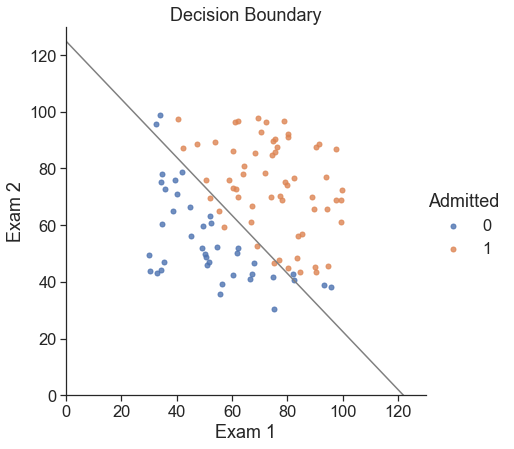

In [41]:
sns.set(context="notebook",style="ticks",font_scale=1.5)
sns.lmplot('Exam 1','Exam 2',hue='Admitted',data=data,
           size=6,
           fit_reg=False,
           scatter_kws={"s": 25}
           )
plt.plot(x,y,'grey')
plt.xlim(0,130)
plt.ylim(0,130)
plt.title('Decision Boundary')
plt.show()

In [42]:
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [44]:
# 正则化逻辑回归：
df = pd.read_csv('ex2data2.txt',names=['test1','test2','accepted'])
df.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


D:\Anaconda3\envs\pt38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda3\envs\pt38\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


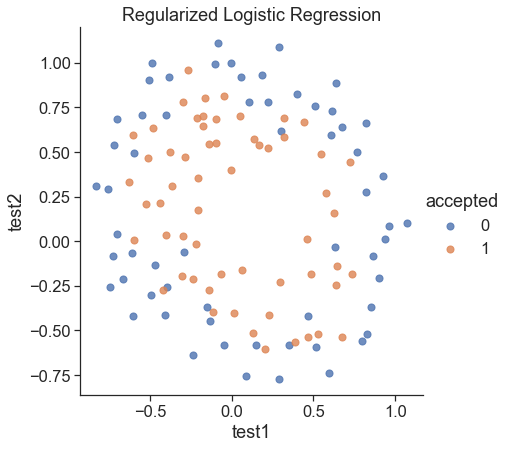

In [45]:
sns.set(context="notebook",style="ticks",font_scale=1.5)
sns.lmplot('test1','test2',hue='accepted',data=df,
           size=6,
           fit_reg=False,
           scatter_kws={"s":50}
           )
plt.title('Regularized Logistic Regression')
plt.show()

In [49]:
## feature mapping(特征映射)
def feature_mapping(x,y,power,as_ndarray=False):
    data={"f{}{}".format(i - p,p): np.power(x,i-p)*np.power(y,p)
            for i in np.arange(power + 1)
            for p in np.arange(i + 1)
          }
    if as_ndarray:
        return pd.DataFrame(data).values
    else:
        return pd.DataFrame(data)

In [50]:
x1 = np.array(df.test1)
x2 = np.array(df.test2)

In [51]:
data = feature_mapping(x1,x2,power=6)
print(data.shape)
data.head

(118, 28)


<bound method NDFrame.head of      f00       f10       f01       f20       f11       f02           f30  \
0    1.0  0.051267  0.699560  0.002628  0.035864  0.489384  1.347453e-04   
1    1.0 -0.092742  0.684940  0.008601 -0.063523  0.469143 -7.976812e-04   
2    1.0 -0.213710  0.692250  0.045672 -0.147941  0.479210 -9.760555e-03   
3    1.0 -0.375000  0.502190  0.140625 -0.188321  0.252195 -5.273438e-02   
4    1.0 -0.513250  0.465640  0.263426 -0.238990  0.216821 -1.352032e-01   
..   ...       ...       ...       ...       ...       ...           ...   
113  1.0 -0.720620  0.538740  0.519293 -0.388227  0.290241 -3.742131e-01   
114  1.0 -0.593890  0.494880  0.352705 -0.293904  0.244906 -2.094682e-01   
115  1.0 -0.484450  0.999270  0.234692 -0.484096  0.998541 -1.136964e-01   
116  1.0 -0.006336  0.999270  0.000040 -0.006332  0.998541 -2.544062e-07   
117  1.0  0.632650 -0.030612  0.400246 -0.019367  0.000937  2.532156e-01   

          f21       f12       f03  ...       f23         

In [52]:
data.describe()

,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
count,118.0,118.000000,118.000000,118.000000,118.000000,118.000000,1.180000e+02,118.000000,118.000000,118.000000,...,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02
mean,1.0,0.054779,0.183102,0.247575,-0.025472,0.301370,5.983333e-02,0.030682,0.015483,0.142350,...,0.018278,4.089084e-03,0.115710,7.837118e-02,-0.000703,1.893340e-02,-0.001705,2.259170e-02,-0.006302,1.257256e-01
std,0.0,0.496654,0.519743,0.248532,0.224075,0.284536,2.746459e-01,0.134706,0.150143,0.326134,...,0.058513,9.993907e-02,0.299092,1.938621e-01,0.058271,3.430092e-02,0.037443,4.346935e-02,0.090621,2.964416e-01
min,1.0,-0.830070,-0.769740,0.000040,-0.484096,0.000026,-5.719317e-01,-0.358121,-0.483743,-0.456071,...,-0.142660,-4.830370e-01,-0.270222,6.472253e-14,-0.203971,2.577297e-10,-0.113448,2.418097e-10,-0.482684,1.795116e-14
25%,1.0,-0.372120,-0.254385,0.043243,-0.178209,0.061086,-5.155632e-02,-0.023672,-0.042980,-0.016492,...,-0.001400,-7.449462e-03,-0.001072,8.086369e-05,-0.006381,1.258285e-04,-0.005749,3.528590e-04,-0.016662,2.298277e-04
50%,1.0,-0.006336,0.213455,0.165397,-0.016521,0.252195,-2.544062e-07,0.006603,-0.000039,0.009734,...,0.001026,-8.972096e-09,0.000444,4.527344e-03,-0.000004,3.387050e-03,-0.000005,3.921378e-03,-0.000020,1.604015e-02
75%,1.0,0.478970,0.646563,0.389925,0.100795,0.464189,1.099616e-01,0.086392,0.079510,0.270310,...,0.021148,2.751341e-02,0.113020,5.932959e-02,0.002104,2.090875e-02,0.001024,2.103622e-02,0.001289,1.001215e-01
max,1.0,1.070900,1.108900,1.146827,0.568307,1.229659,1.228137e+00,0.449251,0.505577,1.363569,...,0.287323,4.012965e-01,1.676725,1.508320e+00,0.250577,2.018260e-01,0.183548,2.556084e-01,0.436209,1.859321e+00


In [53]:
## regularized cost 正则化的代价函数
theta = np.zeros(data.shape[1])
X = feature_mapping(x1,x2,power=6,as_ndarray=True)
print(X.shape)

y=get_y(df)
print(y.shape)

(118, 28)
(118,)


In [54]:
def regularized_cost(theta,X,y,l=1):
    theta_j1_to_n=theta[1:]
    regularized_term = (l/(2*len(X)))*np.power(theta_j1_to_n,2).sum()

    return cost(theta,X,y) + regularized_term

In [55]:
regularized_cost(theta,X,y,l=1)

0.6931471805599454

In [56]:
##正则化梯度 regularized_gradient
def regularized_gradient(theta,X,y,l=1):
    theta_j1_to_n=theta[1:]
    regularized_theta=(l/len(X)) * theta_j1_to_n

    regularized_term = np.concatenate([np.array([0]),regularized_theta])
    return gradient(theta,X,y) + regularized_term

In [57]:
regularized_gradient(theta,X,y)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

In [60]:
# 拟合参数
import scipy.optimize as opt

In [62]:
print('init cost = {}'.format(regularized_cost(theta,X,y)))
res=opt.minimize(fun=regularized_cost, x0=theta, args=(X,y),method='Newton-CG',jac=regularized_gradient)
res

init cost = 0.6931471805599454


     fun: 0.5290027297127612
     jac: array([-1.60740780e-07, -1.58538964e-08,  1.06486991e-07, -2.96048281e-08,
       -1.36907306e-08, -1.78552173e-08,  1.21337189e-08,  3.39938020e-08,
       -6.93379767e-09,  1.69987207e-08, -5.43369757e-08, -1.39351806e-08,
       -4.91374828e-08, -6.58144222e-09, -4.05267697e-08,  2.82577621e-09,
        2.06529972e-08, -2.26649515e-08, -4.13563610e-09, -5.83515990e-09,
       -9.49203498e-09, -4.06385106e-08, -2.13722894e-09, -2.19256821e-08,
       -1.17427036e-08, -1.56741871e-08, -4.93416876e-09, -3.51650932e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 70
  status: 0
 success: True
       x: array([ 1.27273851,  0.62527111,  1.18108747, -2.01996001, -0.91742379,
       -1.43166247,  0.12400683, -0.36553404, -0.35723917, -0.17513008,
       -1.45815729, -0.05098941, -0.61555647, -0.27470636, -1.19281609,
       -0.24218811, -0.20600567, -0.04473124, -0.27778473, -0.29537796,
       -0.4

In [63]:
#预测
final_theta=res.x
y_pred=predict(X,final_theta)

print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



In [68]:
#使用不同的lambda来画出决策边界
def draw_boundary(power,l):
    density=1000
    threshhold=2*10**-3

    final_theta=feature_mapped_logistic_regression(power,l)
    x,y=find_decission_boundary(density,power,final_theta,threshhold)

    df=pd.read_csv('ex2data2.txt',names=['test1','test2','accepted'])
    sns.lmplot('test1','test2',hue='accepted',data=df,size=6,fit_reg=False,scatter_kws={"s":100})

    plt.scatter(x,y,c='r',s=10)
    plt.title('Decision boundary')
    plt.show()

In [65]:
def feature_mapped_logistic_regression(power,l):
    df=pd.read_csv('ex2data2.txt',names=['test1','test2','accepted'])
    x1 = np.array(df.test1)
    x2 = np.array(df.test2)
    y=get_y(df)

    X=feature_mapping(x1,x2,power,as_ndarray=True)
    theta=np.zeros(X.shape[1])

    res=opt.minimize(fun=regularized_cost, x0=theta, args=(X,y,l),method='TNC',jac=regularized_gradient)
    final_theta=res.x

    return final_theta

In [66]:
def find_decission_boundary(density,power,theta,threshhold):
    t1 = np.linspace(-1,1.5,density)
    t2 = np.linspace(-1,1.5,density)

    cordinates=[(x,y) for x in t1 for y in t2]
    x_cord,y_cord=zip(*cordinates)
    mapped_cord = feature_mapping(x_cord,y_cord,power)

    inner_product = mapped_cord.values @ theta
    decision = mapped_cord[np.abs(inner_product) < threshhold]

    return decision.f10,decision.f01

D:\Anaconda3\envs\pt38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda3\envs\pt38\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


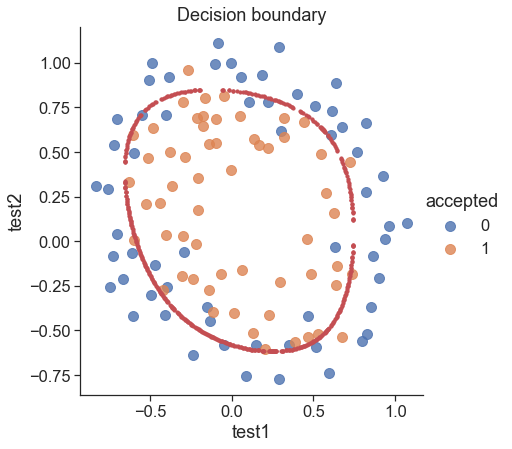

In [69]:
draw_boundary(power=6,l=1)

D:\Anaconda3\envs\pt38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda3\envs\pt38\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


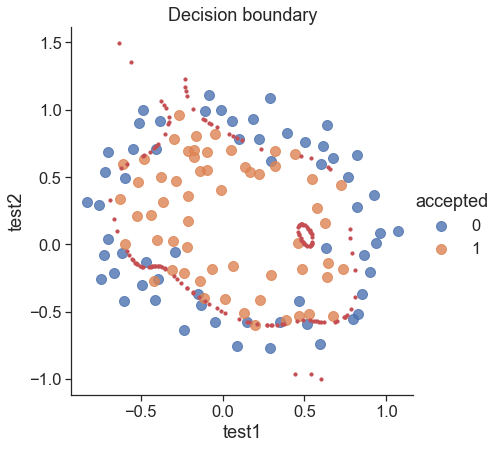

In [70]:
#g过拟合
draw_boundary(power=6,l=0)

D:\Anaconda3\envs\pt38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda3\envs\pt38\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


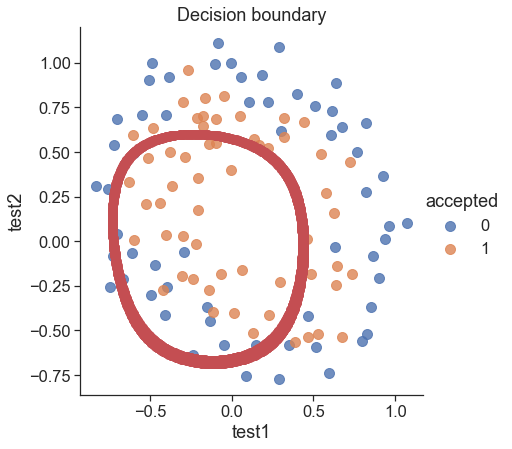

In [71]:
# 欠拟合
draw_boundary(power=6,l=100)